In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import core  # custom module for windspeed, pv_pot
from multiprocessing import Pool

def adjust_longitudes(ds):
    """ Adjust longitudes from 0-360 to -180 to 180 if needed """
    if (ds.longitude > 180).any():
        ds['longitude'] = ((ds.longitude + 180) % 360) - 180
    ds = ds.sortby(ds.longitude)
    return ds

def extract_europe(ds):
    ds = adjust_longitudes(ds)
    lat_bounds = (35, 71)  # Bounds for Europe
    lon_bounds = (-25, 40)
    return ds.sel(latitude=slice(71, 35), longitude=slice(lon_bounds[0], lon_bounds[1]))


PV Potential Vorticity Mean for 2000-02:
<xarray.DataArray 'pv_pot' (latitude: 145, longitude: 261)> Size: 151kB
array([[0.01514313, 0.01489929, 0.01499907, ..., 0.01168691, 0.01155437,
        0.01142243],
       [0.0156491 , 0.01531411, 0.01542651, ..., 0.01207118, 0.01196909,
        0.01186896],
       [0.01594522, 0.01585235, 0.01565384, ..., 0.0125412 , 0.01245263,
        0.01234956],
       ...,
       [0.14198074, 0.14268169, 0.14329799, ..., 0.18040265, 0.18007845,
        0.17843091],
       [0.14357205, 0.14408827, 0.14467381, ..., 0.18266284, 0.18257609,
        0.18165828],
       [0.1448326 , 0.14521354, 0.14584999, ..., 0.1840985 , 0.18405594,
        0.18396926]], dtype=float32)
Coordinates:
    number     int64 8B 0
  * latitude   (latitude) float64 1kB 71.0 70.75 70.5 70.25 ... 35.5 35.25 35.0
  * longitude  (longitude) float64 2kB -25.0 -24.75 -24.5 ... 39.5 39.75 40.0
PV Potential Vorticity Mean for 2000-01:
<xarray.DataArray 'pv_pot' (latitude: 145, longitude: 261

/tmp/ipykernel_734525/370433764.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(image_filename))


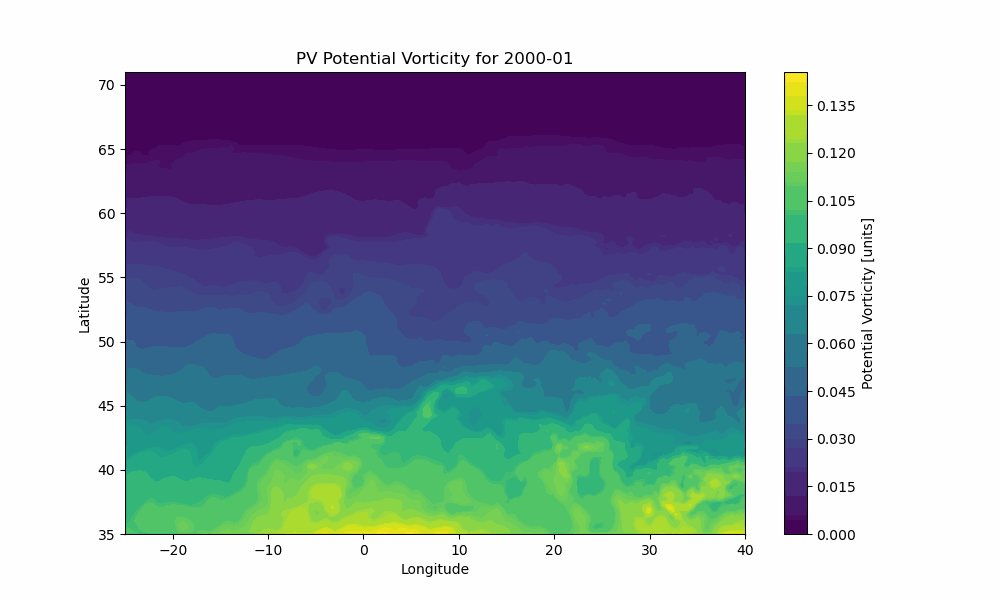

In [5]:
def plot_monthly_pv_pot_2000(data, month, year=2000):
    plt.figure(figsize=(10, 6))
    plt.contourf(data.longitude, data.latitude, data, levels=100, cmap='viridis')
    plt.title(f'PV Potential Vorticity for {year}-{month:02d}')
    plt.colorbar(label='Potential Vorticity [units]')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig(f'PV_Pot_2000_{month:02d}.png')
    plt.close()

def process_month_2000(month):
    base_path = '/home/harshitl69/LEHRE/msc-intro-comp-met-ex-w2024/data/era5/'
    year = 2000
    file_path = f"{base_path}era5-{year}-{month:02d}.nc"
    try:
        ds = xr.open_dataset(file_path)
        ds = extract_europe(ds)
        ds['wspd'] = core.windspeed(ds)
        ds['pv_pot'] = core.pv_pot(ds)
        monthly_mean_pv_pot = ds['pv_pot'].mean(dim='valid_time').compute()
        print(f"PV Potential Vorticity Mean for {year}-{month:02d}:")
        print(monthly_mean_pv_pot)
        plot_monthly_pv_pot_2000(monthly_mean_pv_pot, month)
        return f"Processed and plotted for {year}-{month:02d}"
    except Exception as e:
        return f"Failed to process file for {year}-{month:02d}: {e}"

if __name__ == "__main__":
    months = range(1, 13)
    with Pool(processes=4) as pool:
        results = pool.map(process_month_2000, months)
    for result in results:
        print(result)
        print()


In [6]:
import imageio
from IPython.display import Image

def create_gif_2000(image_path_pattern, gif_path, duration=0.5):
    images = []
    for month in range(1, 13):
        image_filename = image_path_pattern.format(month)
        images.append(imageio.imread(image_filename))
    imageio.mimsave(gif_path, images, duration=duration)

# Call function after all PNGs generated
create_gif_2000('PV_Pot_2000_{:02d}.png', 'PV_Pot_2000.gif')
Image(filename='PV_Pot_2000.gif')


Processed and plotted for 2001-01

Processed and plotted for 2001-02

Processed and plotted for 2001-03

Processed and plotted for 2001-04

Processed and plotted for 2001-05

Processed and plotted for 2001-06

Processed and plotted for 2001-07

Processed and plotted for 2001-08

Processed and plotted for 2001-09

Processed and plotted for 2001-10

Processed and plotted for 2001-11

Processed and plotted for 2001-12

